In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import seaborn as sns

# Load The Data 

In [98]:
train = pd.read_csv('../../Datasets/MnistDataset/train.csv')
test =pd.read_csv('../../Datasets/MnistDataset/test.csv')


In [99]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [101]:
def show_sample_images(df, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
    pixel_cols = [col for col in df.columns if col != 'label']
    for i, ax in enumerate(axes):
        image = df.iloc[i][pixel_cols].values.astype(np.float32)
        image = image.reshape(28, 28)
        ax.imshow(image, cmap='gray')
        ax.axis('off')
        if 'label' in df.columns:
            ax.set_title(f"Label: {df.iloc[i]['label']}")
    plt.show()

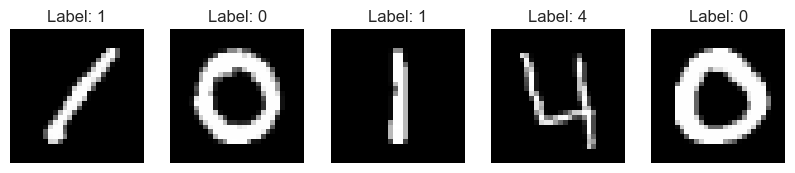

In [102]:
show_sample_images(train, num_images=5)

C:\Users\Arvind\AppData\Local\Temp\ipykernel_21240\4272451274.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train["label"], palette="viridis")


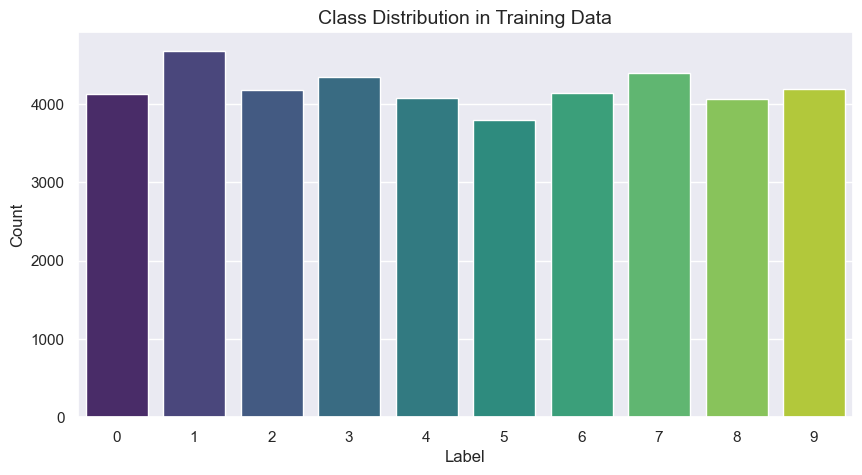

In [103]:
sns.set_theme(style="darkgrid", palette="muted")
plt.figure(figsize=(10, 5))
sns.countplot(x=train["label"], palette="viridis")
plt.title("Class Distribution in Training Data", fontsize=14)
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

## PreProcessing 

In [104]:
X = train.drop("label", axis=1).values.astype(np.float32)
y = train["label"].values

In [105]:
X = X / 255.0
X_test = test.values.astype(np.float32) / 255.0


In [116]:
len(X[0])

28

In [106]:
X = X.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [107]:
num_classes = len(np.unique(y))
y_cat = to_categorical(y, num_classes)


## Test Train Split

In [108]:
X_train, X_val, y_train, y_val = train_test_split(X, y_cat, test_size=0.2, random_state=42)


In [115]:
len(X_train[0])

28

## Building Model


In [109]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


e:\ml\AI models\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [110]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=10, batch_size=64)

Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7454 - loss: 0.7699 - val_accuracy: 0.9694 - val_loss: 0.0972
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.9578 - loss: 0.1396 - val_accuracy: 0.9805 - val_loss: 0.0618
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9673 - loss: 0.1014 - val_accuracy: 0.9851 - val_loss: 0.0491
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.9751 - loss: 0.0831 - val_accuracy: 0.9873 - val_loss: 0.0412
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.9760 - loss: 0.0758 - val_accuracy: 0.9879 - val_loss: 0.0386
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.9797 - loss: 0.0669 - val_accuracy: 0.9888 - val_loss: 0.0325
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9812 - loss: 0.0579 - val_accuracy: 0.9879 - val_loss: 0.0362
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9810 - loss: 0.0559 - 

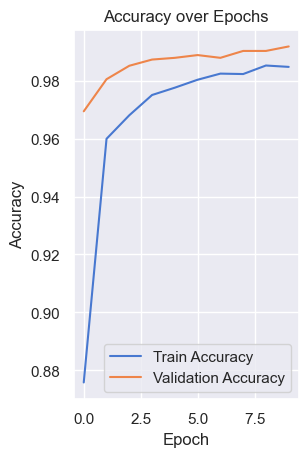

In [112]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

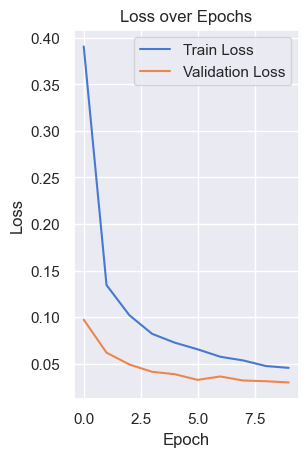

In [113]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [114]:
predictions_prob = model.predict(X_test)
predictions = np.argmax(predictions_prob, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


In [ ]:
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 



263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [124]:

Y_pred_classes

array([8, 1, 9, ..., 3, 0, 9])

In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate various performance metrics
def print_performance_metrics(y_true, y_pred):
    print("\nPerformance Metrics:")
    print("-" * 50)
    
    # Calculate scores
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # Print basic metrics
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    
    # Print detailed classification report
    print("\nDetailed Classification Report:")
    print("-" * 50)
    print(classification_report(y_true, y_pred, digits=4))

# Call the function with our predictions
print_performance_metrics(Y_true, Y_pred_classes)


Performance Metrics:
--------------------------------------------------
Accuracy:  0.9918
Precision: 0.9918
Recall:    0.9918
F1 Score:  0.9918

Detailed Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.9975    0.9926    0.9951       816
           1     0.9945    0.9989    0.9967       909
           2     0.9929    0.9929    0.9929       846
           3     0.9925    0.9904    0.9915       937
           4     0.9964    0.9905    0.9934       839
           5     0.9803    0.9915    0.9858       702
           6     0.9848    0.9898    0.9873       785
           7     0.9944    0.9910    0.9927       893
           8     0.9904    0.9892    0.9898       835
           9     0.9916    0.9905    0.9910       838

    accuracy                         0.9918      8400
   macro avg     0.9915    0.9917    0.9916      8400
weighted avg     0.9918    0.9918    0.9918      8400

